In [ ]:
# pip install vgg-pytorch

In [ ]:
# pip install torchlars


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#some of blocks below are not used.
# Data manipulation
import numpy as np
import pandas as pd
# import vgg_pytorch as vp
# Data visualisation
import matplotlib.pyplot as plt
from torchvision import  models

#from torchlars import LARS


# Fastai
from fastai.vision import *
from fastai.vision.models import *

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.utils
import torchvision.datasets as dset

from torch import optim
from torch.utils.data import DataLoader,Dataset
from torchvision.models import *
from torchvision.datasets import ImageFolder
from torch.autograd import Variable
#import pretrainedmodels

from pathlib import Path
import sys

from glob import glob
from PIL import Image,ImageOps

In [ ]:
np.random.seed(42)#To make sure that each time you run this kernal, you will get the same beginning parameters.

BATCH_SIZE=16
NUMBER_EPOCHS=20
IMG_SIZE=224

In [ ]:
def imshow(img,text=None,should_save=False):#for showing the data you loaded to dataloader
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

def show_plot(iteration,loss):# for showing loss value changed with iter
    plt.plot(iteration,loss)
    plt.show()


In [ ]:
df0 =  pd.read_csv("drive/MyDrive/input/KinFaceW-II/KinFaceW-II/fd.csv",names=["Parent", "Son","Label"])
df0["Label"] = 0


In [ ]:
df1 =  pd.read_csv("drive/MyDrive/input/KinFaceW-II/KinFaceW-II/fs.csv",names=["Parent", "Son","Label"])
df1["Label"] = 1

In [ ]:
df2 = pd.read_csv("drive/MyDrive/input/KinFaceW-II/KinFaceW-II/md.csv",names=["Parent", "Son","Label"])
df2["Label"] = 2

In [ ]:
df3 =  pd.read_csv("drive/MyDrive/input/KinFaceW-II/KinFaceW-II/ms.csv",names=["Parent", "Son","Label"])
df3["Label"] = 3

In [ ]:
df0s =  pd.read_csv("drive/MyDrive/input/KinFaceW-II/KinFaceW-II/fd.csv",names=["Son", "Parent","Label"])
df1s =  pd.read_csv("drive/MyDrive/input/KinFaceW-II/KinFaceW-II/fs.csv",names=["Son", "Parent","Label"])
df3s =  pd.read_csv("drive/MyDrive/input/KinFaceW-II/KinFaceW-II/ms.csv",names=["Son", "Parent","Label"])
df2s = pd.read_csv("drive/MyDrive/input/KinFaceW-II/KinFaceW-II/md.csv",names=["Son", "Parent","Label"])
df0s["Label"] = 0
df1s["Label"] = 1
df2s["Label"] = 2
df3s["Label"] = 3

In [ ]:
df00 = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
df00not = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
for i in range(0,len(df0)):
  temp = df0.iloc[i]
  if df0.iloc[i]["Parent"][0:7] == df0.iloc[i]["Son"][0:7]:
    df00.loc[i] = temp
  else:
    df00not.loc[i] = temp


In [ ]:
df11 = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
df11not = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
for i in range(0,len(df1)):
  temp = df1.iloc[i]
  if df1.iloc[i]["Parent"][0:7] == df1.iloc[i]["Son"][0:7]:
    df11.loc[i] = temp
  else:
    df11not.loc[i] = temp

In [ ]:
df22 = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
df22not = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
for i in range(0,len(df2)):
  temp = df2.iloc[i]
  if df2.iloc[i]["Parent"][0:7] == df2.iloc[i]["Son"][0:7]:
    df22.loc[i] = temp
  else:
    df22not.loc[i] = temp

In [ ]:
df33 = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
df33not = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
for i in range(0,len(df3)):
  temp = df3.iloc[i]
  if df3.iloc[i]["Parent"][0:7] == df3.iloc[i]["Son"][0:7]:
    df33.loc[i] = temp
  else:
    df33not.loc[i] = temp

In [ ]:
df00s = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
df00snot = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
for i in range(0,len(df0s)):
  temp = df0s.iloc[i]
  if df0s.iloc[i]["Parent"][0:7] == df0s.iloc[i]["Son"][0:7]:
    df00s.loc[i] = temp
  else:
    df00snot.loc[i] = temp

df11s = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
df11snot = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
for i in range(0,len(df1s)):
  temp = df1s.iloc[i]
  if df1s.iloc[i]["Parent"][0:7] == df1s.iloc[i]["Son"][0:7]:
    df11s.loc[i] = temp
  else:
    df11snot.loc[i] = temp


df22s = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
df22snot = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
for i in range(0,len(df2s)):
  temp = df2s.iloc[i]
  if df2s.iloc[i]["Parent"][0:7] == df2s.iloc[i]["Son"][0:7]:
    df22s.loc[i] = temp
  else:
    df22snot.loc[i] = temp


df33s = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
df33snot = pd.DataFrame(columns=['Parent', 'Son', 'Label'])
for i in range(0,len(df3s)):
  temp = df3s.iloc[i]
  if df3s.iloc[i]["Parent"][0:7] == df3s.iloc[i]["Son"][0:7]:
    df33s.loc[i] = temp
  else:
    df33snot.loc[i] = temp

In [ ]:
dfFinals =  pd.concat([df00s,df11s,df22s,df33s])
# dfFinalsNots = pd.concat([df00snot,df11snot,df22snot,df33snot])
# dfFinalsNots["Label"] = 4

# dfTotals = pd.concat([dfFinals,dfFinalsNots])
dfTotals = dfFinals

In [ ]:
dfFinal = pd.concat([df00,df11,df22,df33])
# dfFinalNot = pd.concat([df00not,df11not,df22not,df33not])
# dfFinalNot["Label"] = 4
DfTotal =dfFinal

In [ ]:
shuffleDfs = dfTotals.sample(frac=1,random_state=1)
shuffleDf = DfTotal.sample(frac=1,random_state=1)


In [ ]:
train_set = shuffleDf.iloc[0:700]
val_set =  shuffleDf.iloc[700:900]
test_set = shuffleDf.iloc[900:1000]

In [ ]:
train_set = pd.concat([shuffleDf.iloc[0:700],shuffleDfs.iloc[0:700]])
val_set =   pd.concat([shuffleDf.iloc[700:900],shuffleDfs.iloc[700:900]])
test_set =  pd.concat([shuffleDf.iloc[900:1000],shuffleDfs.iloc[900:1000]])

In [ ]:
val_set.iloc[0:]
val_set [(val_set["Parent"] == "fs_014_1.jpg" )|(val_set["Parent"] == "fs_014_2.jpg")]

,Parent,Son,Label


In [ ]:
def converti(label):
      if label == 0:
        return "father-dau"
      elif label == 1:
        return "father-son"
      elif label == 2:
        return "mother-dau"
      elif label == 3:
        return "mother-son"
      else:
        return "Non-Kinship"

In [ ]:
class trainingDataset(Dataset):#Get two images and whether they are related.
    
    def __init__(self, dataFrame, transform=None):
        self.dataFrame = dataFrame #choose either train or val dataset to use
        self.transform = transform
   
        
    def __getitem__(self,index):
        img0_info = self.dataFrame.iloc[index]["Parent"] #for each relationship in train_relationships.csv, the first img comes from first row, and the second is either specially choosed related person or randomly choosed non-related person
        img1_info = self.dataFrame.iloc[index]["Son"]
        label_number = self.dataFrame.iloc[index]["Label"] 
        label_desc = converti(label_number)
        if label_desc == "Non-Kinship":
          if "fd" in img0_info:
            img0_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+"father-dau"+"/"+img0_info
          if "fs" in img0_info:
            img0_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+"father-son"+"/"+img0_info
          if "md" in img0_info:
            img0_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+"mother-dau"+"/"+img0_info
          if "ms" in img0_info:
            img0_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+"mother-son"+"/"+img0_info
          
          if "fd" in img1_info:
            img1_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+"father-dau"+"/"+img1_info
          if "fs" in img1_info:
            img1_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+"father-son"+"/"+img1_info
          if "md" in img1_info:
            img1_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+"mother-dau"+"/"+img1_info
          if "ms" in img1_info:
            img1_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+"mother-son"+"/"+img1_info
          # if "madre" in img0_info:
          #   img0_path = "drive/MyDrive/input/try/3madre.jpg"
          # if "figlia" in img0_info:
          #   img0_path = "drive/MyDrive/input/try/3figlia.jpg"
          # if "scon" in img0_info:
          #   img0_path = "drive/MyDrive/input/try/3sconosc.jpg"
          # if "madre" in img1_info:
          #   img1_path = "drive/MyDrive/input/try/3madre.jpg"
          # if "figlia" in img1_info:
          #   img1_path = "drive/MyDrive/input/try/3figlia.jpg"
          # if "scon" in img1_info:
          #   img1_path = "drive/MyDrive/input/try/3sconosc.jpg"
        else:

          img0_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+label_desc+"/"+img0_info
          img1_path ="drive/MyDrive/input/KinFaceW-II/KinFaceW-II/images/"+label_desc+"/"+img1_info        
        img0 = Image.open(img0_path)
        img1 = Image.open(img1_path)
        
        if self.transform is not None:#I think the transform is essential if you want to use GPU, because you have to trans data to tensor first.
            img0 = self.transform(img0)
            img1 = self.transform(img1)
        return img0, img1 , label_number #the returned data from dataloader is img=[batch_size,channels,width,length], should_get_same_class=[batch_size,label]
    
    def __len__(self):
        return len(self.dataFrame)#essential for choose the num of data in one epoch

In [ ]:
#train_set, val_set,test_set = torch.utils.data.random_split(images, [1200, 500,300])

trainset = trainingDataset(dataFrame=train_set,
                                        transform=transforms.Compose([transforms.Resize((IMG_SIZE,IMG_SIZE)),
                                                                      transforms.ToTensor()
                                                                      ]))
trainloader = DataLoader(trainset,
                        shuffle=True,#whether randomly shuffle data in each epoch, but cannot let data in one batch in order.
                        num_workers=8,
                        batch_size=BATCH_SIZE)

valset = trainingDataset(dataFrame=val_set,
                                        transform=transforms.Compose([transforms.Resize((IMG_SIZE,IMG_SIZE)),
                                                                      transforms.ToTensor()
                                                                      ]))
valloader = DataLoader(valset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=BATCH_SIZE)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


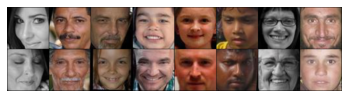

[2 1 0 1 0 0 2 1]


In [ ]:
#only for visualize data in dataloader, it won't matters if you delete this block.
vis_dataloader = DataLoader(trainset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())


In [ ]:
class SiameseNetwork(nn.Module):# A simple implementation of siamese network, ResNet50 is used, and then connected by three fc layer.
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn1 = vgg16(pretrained=True)# wide_resnet50_2(pretrained=True)##vp.VGG.from_pretrained('vgg16')#resnet50 doesn't work, might because pretrained model recognize all faces as the same.
        #self.ccn1.classifier =  nn.Linear(100*100, )
        # #Freeze training for all layers
        for param in self.cnn1.features.parameters():
          param.require_grad = False
        
        for param in self.cnn1.classifier.parameters():
          param.require_grad = False



        #Newly created modules have require_grad=True by default
        num_features = self.cnn1.classifier[3].in_features
        features = list(self.cnn1.classifier.children())[:-3] # Remove last layer
        
        self.cnn1.classifier = nn.Sequential(*features) # Replace the model classifier
        # features.extend([nn.Linear(num_features, 1000)]) # Add our layer with 4 outputs
        # features.extend([nn.ReLU(inplace=True)])
        # features.extend([nn.Dropout()]) # Add our layer with 4 outputs
        # self.cnn1.classifier[3].out_features = 5
        self.new_classifier = features
        # self.pool =  nn.MaxPool2d
        self.fc1 = nn.Linear(num_features*3, 1024)
        self.fc2 = nn.Linear(1024, 500)
        self.fc3 = nn.Linear(500, 4)


    def forward(self, input1, input2):#did not know how to let two resnet share the same param.
        # self.cnn1.classifier = nn.Sequential(*self.new_classifier).cuda()
        output1 = self.cnn1(input1)
        output1 = output1.view(output1.size()[0], -1)#make it suitable for fc layer.
        #output1 = F.max_pool2d(output1,kernel_size=3)
        #output1 = self.pool(2)(output1)
        #output1 = torch.cat((output1,output1),1)
        output2 = self.cnn1(input2)
        output2 = output2.view(output2.size()[0], -1)
        # output2 = self.pool(2)(output2)
        #output2 = torch.cat((output2,output2),1)
        substract_out = torch.subtract(output1,output2)
        diffal2 = torch.multiply(substract_out,substract_out)
        molt = torch.multiply(output1,output2)
        output1al2 = torch.multiply(output1,output1)
        output2al2 = torch.multiply(output2,output2)
        diffdei2 = torch.abs(torch.subtract(output1al2,output2al2))
        output = torch.cat((diffal2, molt,diffdei2),1)
        output = F.relu(self.fc1(output))
        output = F.relu(self.fc2(output))
        output = self.fc3(output)
        return output

In [ ]:
pathModel ='/content/drive/My Drive/input/Prova1simple_network-Kinface2_12-06-4ClassiSIabs3FEParamBloccCopia.h5'

In [ ]:
net = SiameseNetwork().cuda()
net.eval()

Epoch： 0  start.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch： 0 loss tensor(0.7767, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 57 %


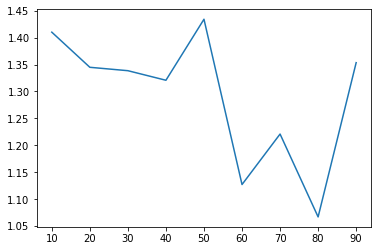

Sovrascrivo...valore precendete 0.0
 Valore migliore 0.57
Epoch： 1  start.
Epoch： 1 loss tensor(0.4510, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 53 %


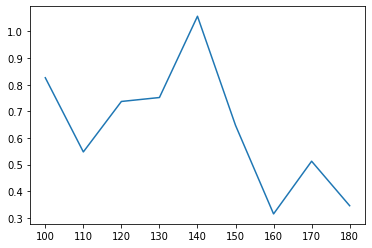

Epoch： 2  start.
Epoch： 2 loss tensor(0.3970, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 60 %


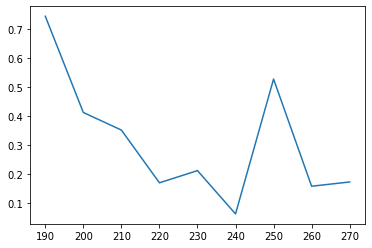

Sovrascrivo...valore precendete 0.57
 Valore migliore 0.6075
Epoch： 3  start.
Epoch： 3 loss tensor(0.0298, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 60 %


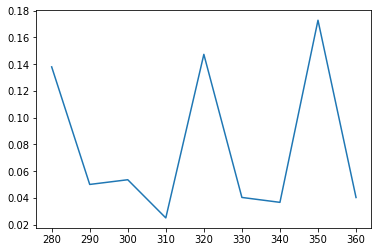

Epoch： 4  start.
Epoch： 4 loss tensor(0.1792, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 57 %


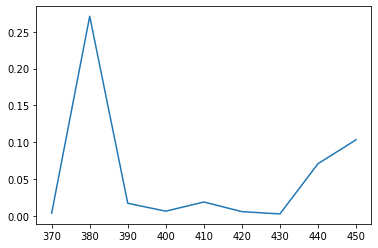

Epoch： 5  start.
Epoch： 5 loss tensor(0.0141, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 60 %


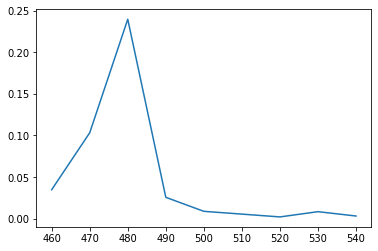

Epoch： 6  start.
Epoch： 6 loss tensor(1.5363e-05, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 61 %


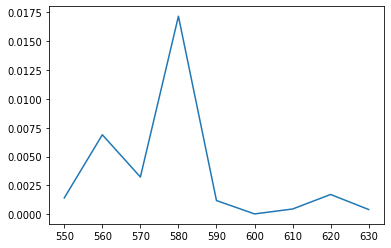

Sovrascrivo...valore precendete 0.6075
 Valore migliore 0.61
Epoch： 7  start.
Epoch： 7 loss tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 64 %


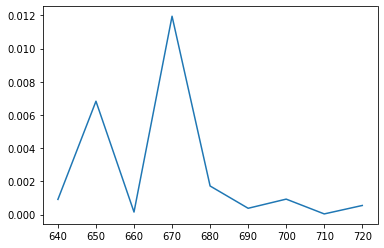

Sovrascrivo...valore precendete 0.61
 Valore migliore 0.64
Epoch： 8  start.
Epoch： 8 loss tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 58 %


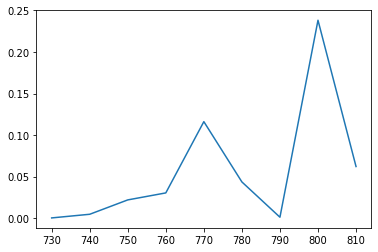

Epoch： 9  start.
Epoch： 9 loss tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 54 %


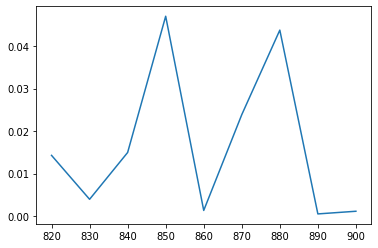

Epoch： 10  start.
Epoch： 10 loss tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 63 %


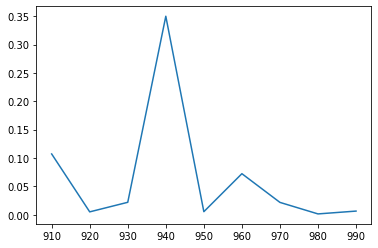

Epoch： 11  start.
Epoch： 11 loss tensor(0.0096, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 53 %


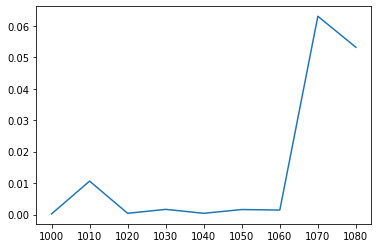

Epoch： 12  start.
Epoch： 12 loss tensor(0.0658, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 58 %


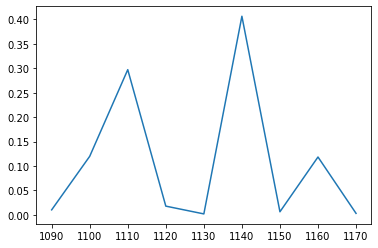

Epoch： 13  start.
Epoch： 13 loss tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 65 %


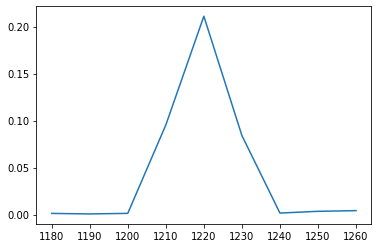

Sovrascrivo...valore precendete 0.64
 Valore migliore 0.65
Epoch： 14  start.
Epoch： 14 loss tensor(8.3487e-05, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 65 %


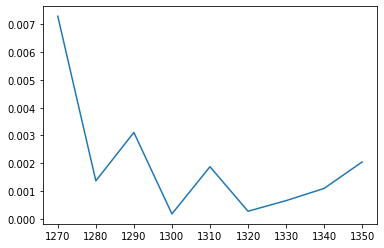

Sovrascrivo...valore precendete 0.65
 Valore migliore 0.6525
Epoch： 15  start.
Epoch： 15 loss tensor(3.7877e-05, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 64 %


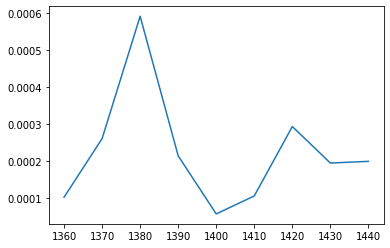

Epoch： 16  start.
Epoch： 16 loss tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 66 %


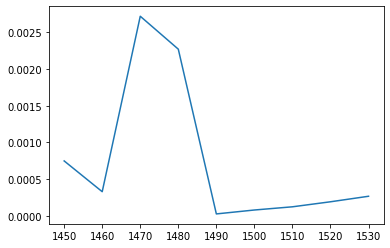

Sovrascrivo...valore precendete 0.6525
 Valore migliore 0.6675
Epoch： 17  start.
Epoch： 17 loss tensor(1.0550e-05, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 64 %


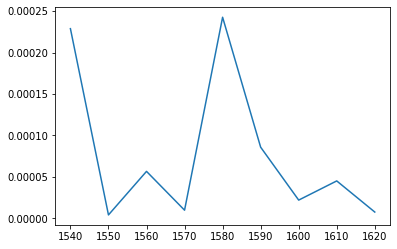

Epoch： 18  start.
Epoch： 18 loss tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 64 %


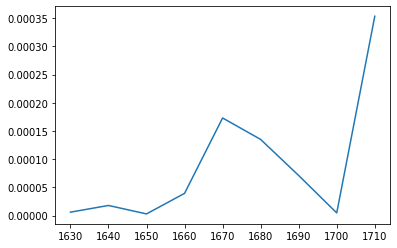

Epoch： 19  start.
Epoch： 19 loss tensor(8.4937e-07, device='cuda:0', grad_fn=<NllLossBackward>)
Accuracy of the network on the 400 : 62 %


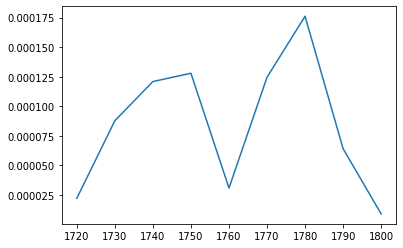

In [ ]:
Max = 0.0
net = SiameseNetwork().cuda()
criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.Adam(net.parameters(), lr=0.00001)
#optimizer = optim.AdamW(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
import torch, gc
gc.collect()
torch.cuda.empty_cache()

iteration_number= 0

for epoch in range(0,NUMBER_EPOCHS):
    print("Epoch：", epoch, " start.")
    loss_history = [] 
    counter = []
    for i, data in enumerate(trainloader,0):
        img0, img1 , labels = data #img=tensor[batch_size,channels,width,length], label=tensor[batch_size,label]
        img0, img1 , labels = img0.cuda(), img1.cuda() , labels.cuda()#move to GPU
        #print("epoch：", epoch, "No." , i, "th inputs", img0.data.size(), "labels", labels.data.size())
        optimizer.zero_grad()#clear the calculated grad in previous batch
        outputs = net(img0,img1)
  
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        if i %10 == 0 :#show changes of loss value after each 10 batches
            #print("Epoch number {}\n Current loss {}\n".format(epoch,loss.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss.item())
    print("Epoch：", epoch, "loss "+str(loss))

    #test the network after finish each epoch, to have a brief training result.
    correct_val = 0
    total_val = 0
    with torch.no_grad():#essential for testing!!!!
        for data in valloader:
            img0, img1 , labels = data
            img0, img1 , labels = img0.cuda(), img1.cuda() , labels.cuda()
            outputs = net(img0,img1)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            
    print('Accuracy of the network on the', total_val, ': %d %%' % (100 * correct_val / total_val))
    show_plot(counter,loss_history)
    val = correct_val / total_val 
    if val > Max:
      print("Sovrascrivo...valore precendete "+str(Max))
      Max = correct_val / total_val
      print(" Valore migliore "+str(Max))
      torch.save(net.state_dict(), pathModel)
      



In [ ]:
pathModel ='/content/drive/MyDrive/input/Prova1simple_network-Kinface2_12-06-4ClassiSIabs3FEParamBlocc.h5'

In [ ]:
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load(pathModel))

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


<All keys matched successfully>

In [ ]:
testset = trainingDataset(dataFrame=test_set,
                                        transform=transforms.Compose([transforms.Resize((IMG_SIZE,IMG_SIZE)),
                                                                      transforms.ToTensor()
                                                                      ]))
testloader = DataLoader(testset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
predictions=[]
lb =[]
with torch.no_grad():
    for data in testloader:
        img0, img1,label = data
        img0, img1,label = img0.cuda(), img1.cuda(),label.cuda()
        outputs = net(img0,img1)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.cpu().numpy())#taking care of here, the output data format is important for transfer
        lb.append(label.cpu().numpy())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
flat_list = [item for sublist in lb for item in sublist]
flat_predictions = [item for sublist in predictions for item in sublist]

In [ ]:
correct = 0
for i in range(0,len(flat_list)):
    if flat_list[i] == flat_predictions[i]:
      correct+=1
  

In [ ]:
labelCM = ["FD", "FS","MD","MS"]

In [ ]:
def Trasform(lista):
  listatemp = []
  for l in lista:
      listatemp.append(labelCM[l])
  return listatemp

[[25  7  3  9]
 [12 37  5  8]
 [ 6  4 33  9]
 [ 0 10  9 23]]


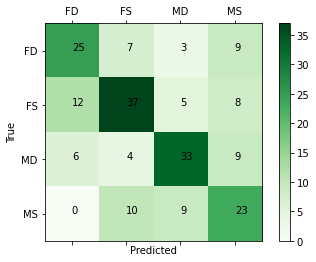

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Trasform(flat_list),Trasform(flat_predictions),labelCM)
print(cm)

fig = plt.figure()

ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
for i in range(len(cm[0])):
  for j in range(len(cm[0])):
    ax.text(j, i, format(cm[i][j], "d"))
ax.set_xticklabels([''] + labelCM)
ax.set_yticklabels([''] + labelCM)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.set_cmap('Greens')
plt.show()

In [ ]:
print(cm[0][0]/(cm[0].sum()))
print(cm[1][1]/(cm[1].sum()))
print(cm[2][2]/(cm[2].sum()))
print(cm[3][3]/(cm[3].sum()))


0.5681818181818182
0.5967741935483871
0.6346153846153846
0.5476190476190477


In [ ]:
print(correct/200*100)

59.0
